<a href="https://colab.research.google.com/github/SheikhJones/Python-Google-Colab-/blob/main/Umair_Shaikh__Pca_With_Ann_for_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import zipfile
import os


zip_path = '/content/dataset (1).zip'
extracted_path = '/content/dataset'


if not os.path.exists(extracted_path):
    os.makedirs(extracted_path)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print("Files unzipped to:", extracted_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset (1).zip'

In [37]:

!pip install numpy pandas scikit-learn tensorflow matplotlib opencv-python

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import os
import cv2


In [39]:
!ls /content

dataset  sample_data


In [40]:
def load_images_from_folder(folder):
    images = []
    labels = []
    target_names = []
    class_names = []

    for person_folder in os.listdir(folder):
        person_folder_path = os.path.join(folder, person_folder)
        if os.path.isdir(person_folder_path):
            class_names.append(person_folder)
            for filename in os.listdir(person_folder_path):
                if filename.endswith('.jpg'):
                    image_path = os.path.join(person_folder_path, filename)
                    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:

                        img = cv2.resize(img, (100, 100))
                        images.append(img.flatten())
                        labels.append(len(class_names) - 1)
                        target_names.append(person_folder)

    return np.array(images), np.array(labels), np.array(target_names), np.array(class_names)


dataset_path = '/content/dataset/dataset/faces'


X, y, target_names, class_names = load_images_from_folder(dataset_path)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Extracting the top 150 eigenfaces from 326 faces


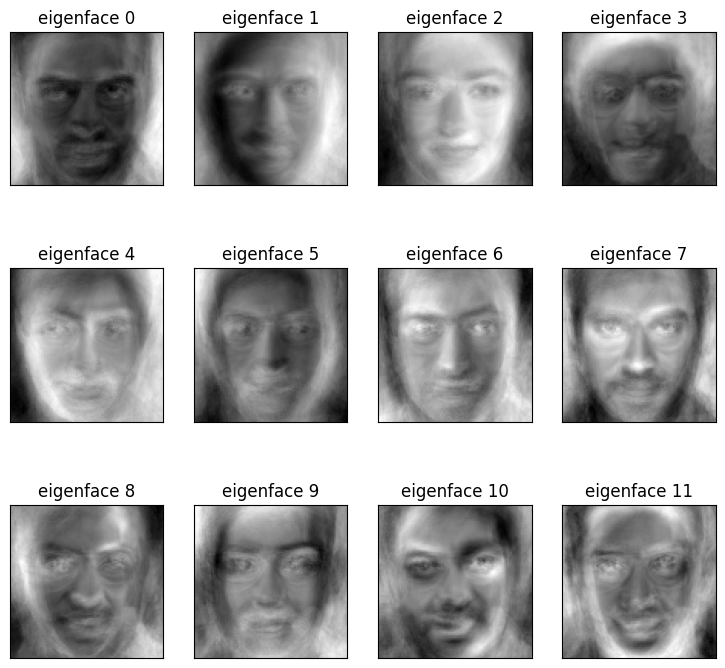

Projecting the input data on the eigenfaces orthonormal basis
(326, 150) (109, 150)


In [42]:

n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, 100, 100))


eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 100, 100)
plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)


In [43]:

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")


Project done...


In [44]:

clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)


Iteration 1, loss = 2.94440256
Iteration 2, loss = 2.89782022
Iteration 3, loss = 2.85292465
Iteration 4, loss = 2.80960739
Iteration 5, loss = 2.76648600
Iteration 6, loss = 2.72444786
Iteration 7, loss = 2.68471209
Iteration 8, loss = 2.64471225
Iteration 9, loss = 2.60602048
Iteration 10, loss = 2.56836729
Iteration 11, loss = 2.53151895
Iteration 12, loss = 2.49481007
Iteration 13, loss = 2.45998499
Iteration 14, loss = 2.42566859
Iteration 15, loss = 2.39177944
Iteration 16, loss = 2.35791932
Iteration 17, loss = 2.32506034
Iteration 18, loss = 2.29344124
Iteration 19, loss = 2.26231511
Iteration 20, loss = 2.23067108
Iteration 21, loss = 2.20065442
Iteration 22, loss = 2.17075343
Iteration 23, loss = 2.14213741
Iteration 24, loss = 2.11405765
Iteration 25, loss = 2.08643593
Iteration 26, loss = 2.05990029
Iteration 27, loss = 2.03256770
Iteration 28, loss = 2.00639908
Iteration 29, loss = 1.98084508
Iteration 30, loss = 1.95581512
Iteration 31, loss = 1.93131606
Iteration 32, los

Accuracy: 68.80733944954129


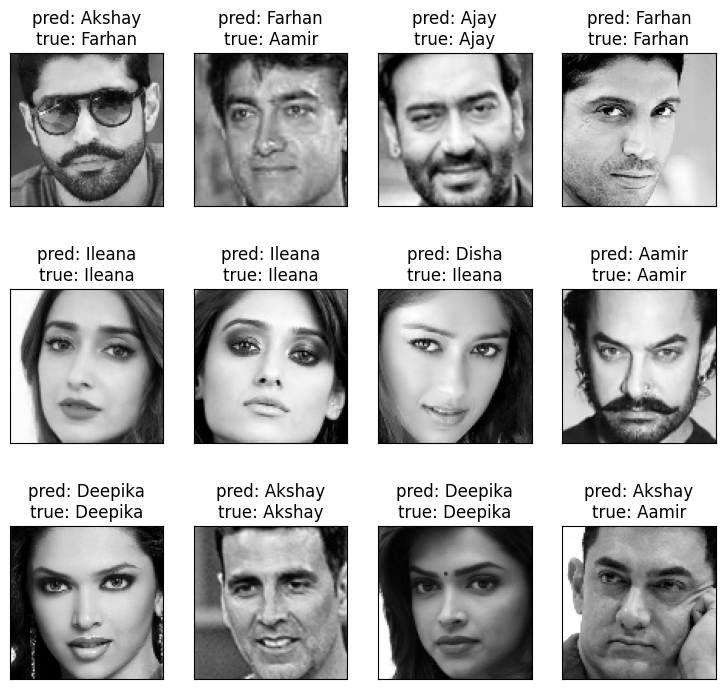

In [45]:

y_pred = clf.predict(X_test_lda)


accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy:", accuracy)


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

prediction_titles = [f'pred: {class_names[y_pred[i]]}\ntrue: {class_names[y_test[i]]}' for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, 100, 100)
plt.show()


In [46]:

accuracy = clf.score(X_test_lda, y_test) * 100
print("Updated Accuracy:", accuracy)


Updated Accuracy: 68.80733944954129


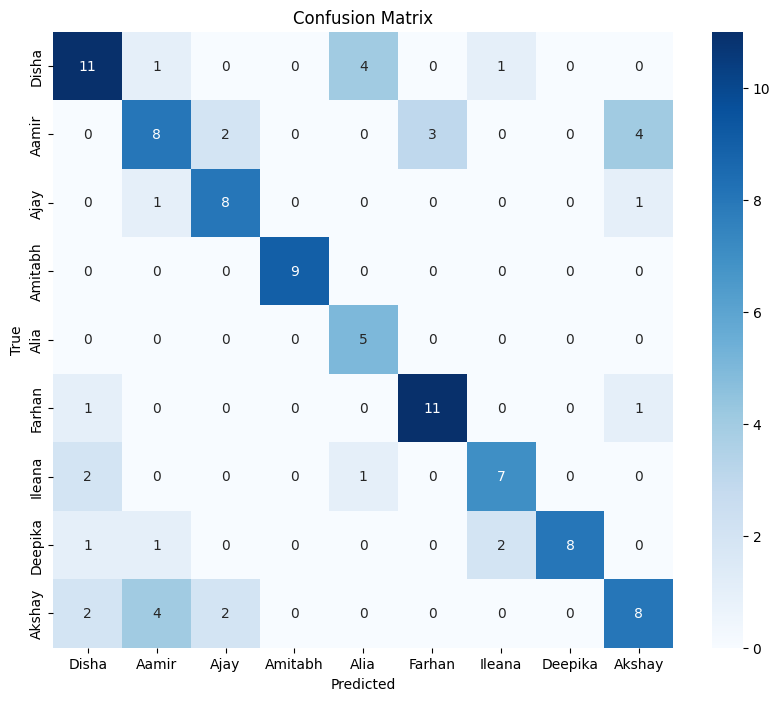

In [47]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Iteration 1, loss = 2.36002564
Iteration 2, loss = 2.00845509
Iteration 3, loss = 1.70211902
Iteration 4, loss = 1.43095929
Iteration 5, loss = 1.20579528
Iteration 6, loss = 1.01926109
Iteration 7, loss = 0.86512925
Iteration 8, loss = 0.73836762
Iteration 9, loss = 0.63185885
Iteration 10, loss = 0.54005371
Iteration 11, loss = 0.46201351
Iteration 12, loss = 0.39641321
Iteration 13, loss = 0.33853485
Iteration 14, loss = 0.29246060
Iteration 15, loss = 0.25435636
Iteration 16, loss = 0.22228179
Iteration 17, loss = 0.19565855
Iteration 18, loss = 0.17397191
Iteration 19, loss = 0.15559714
Iteration 20, loss = 0.14084366
Iteration 21, loss = 0.12833190
Iteration 22, loss = 0.11781328
Iteration 23, loss = 0.10849234
Iteration 24, loss = 0.10113888
Iteration 25, loss = 0.09436056
Iteration 26, loss = 0.08863570
Iteration 27, loss = 0.08350667
Iteration 28, loss = 0.07909217
Iteration 29, loss = 0.07516163
Iteration 30, loss = 0.07175370
Iteration 31, loss = 0.06863007
Iteration 32, los

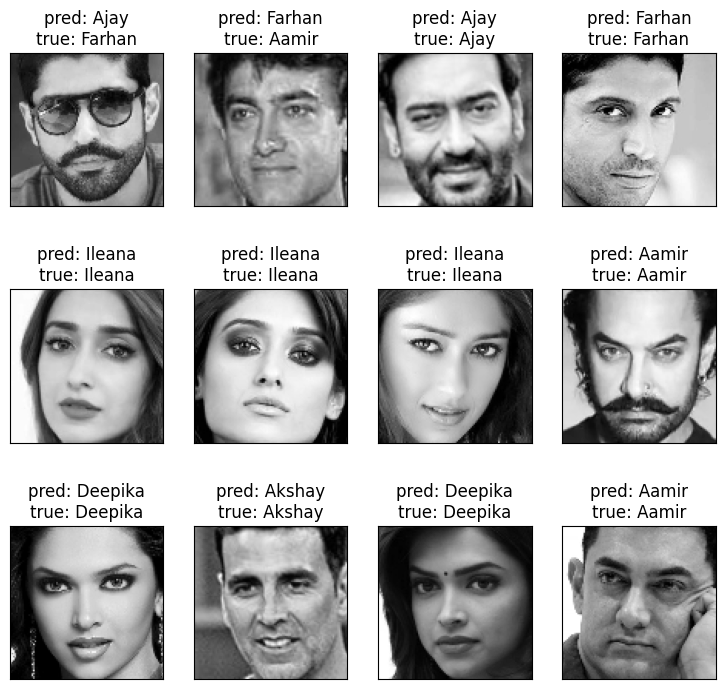

In [48]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=1, hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True).fit(X_train_lda, y_train)


y_pred = clf.predict(X_test_lda)


updated_accuracy = clf.score(X_test_lda, y_test) * 100
print("Updated Accuracy:", updated_accuracy)


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

prediction_titles = [f'pred: {class_names[y_pred[i]]}\ntrue: {class_names[y_test[i]]}' for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, 100, 100)  # Assuming the images are resized to 100x100
plt.show()
